# Linear Regression

The code for the linear regression model sits in ml.linear.lnearRegress.

In [351]:
import numpy as np
import matplotlib.pyplot as plt
import utils as ml
from numpy import atleast_2d
from numpy import asarray

np.random.seed(0)
%matplotlib inline

## Simple Slope

Starting with a simple example where the linear regression model has to fit a simple slope line.

In [352]:
# First we create the "fake data" with xs from 0 to 10 and Y = X + 2
X = np.linspace(0, 10, 50)
print(X.shape)
Y = np.copy(X) + 2
print(Y.shape)

(50,)
(50,)


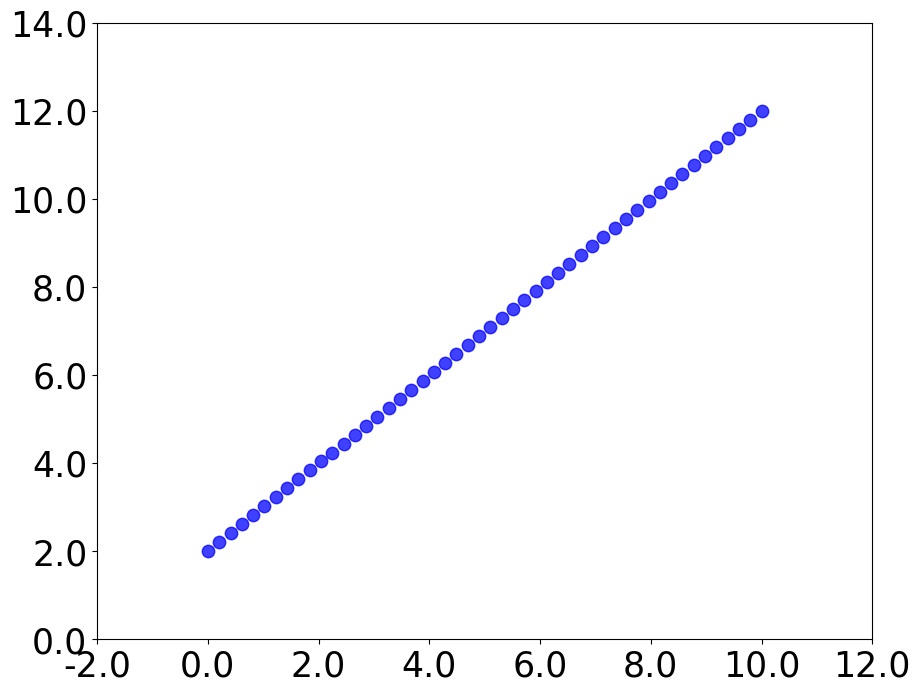

In [353]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
ax.scatter(X, Y, s=80, color='blue', alpha=0.75)

ax.set_xlim(-0.2, 10.2)
ax.set_ylim(1.8, 12.2)
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks(), fontsize=25)
ax.set_yticklabels(ax.get_yticks(), fontsize=25)   

plt.show()    

Now let's create a test and train data out of it.

``` python
X, Y = ml.shuffleData(X, Y) 

# ---------------------------------------------------------------------------
# IndexError                                Traceback (most recent call last)
# Cell In[14], line 1
# ----> 1 X, Y = ml.shuffleData(X, Y)

# File ~/Code/Study/machine-learning-collection/linear-regression/utils/utils.py:163, in shuffleData(X, Y)
#     160 ny = len(Y)
#     162 pi = np.random.permutation(nx)
# --> 163 X = X[pi,:]
#     165 if ny > 0:
#     166     assert ny == nx, 'shuffleData: X and Y must have the same length'

# IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed
```

If we run the above code, it will have a error.

This error is a result of some assumptions in the code. All the mltools package code assumes that the X is a 2d array and not 1d. This is a common assumption and it is also used in more popular packages.

There are many ways to convert from 1d to 2d. The most popular is the atleast_2d

In [354]:
_ = np.atleast_2d(X).T
print(_.shape)

(50, 1)


Another option is to use reshape. Look at the documentation to see what's the -1 is all about.

In [355]:
X = X.reshape(-1, 1)
print(X.shape)

(50, 1)


Notice that I transformed it after the atleast2d call. That's because it is common to think of X where the rows are the points and the columns are the dimensions. Please play around with those methods to make sure you understand what it's doing.

Now let's continue from where we stopped.

In [356]:
print(X.shape, Y.shape)
X, Y = ml.shuffleData(X, Y)
Xtr, Xte, Ytr, Yte = ml.splitData(X, Y, 0.75)
print(Xtr.shape, Xte.shape, Ytr.shape, Yte.shape)

(50, 1) (50,)
(38, 1) (12, 1) (38,) (12,)


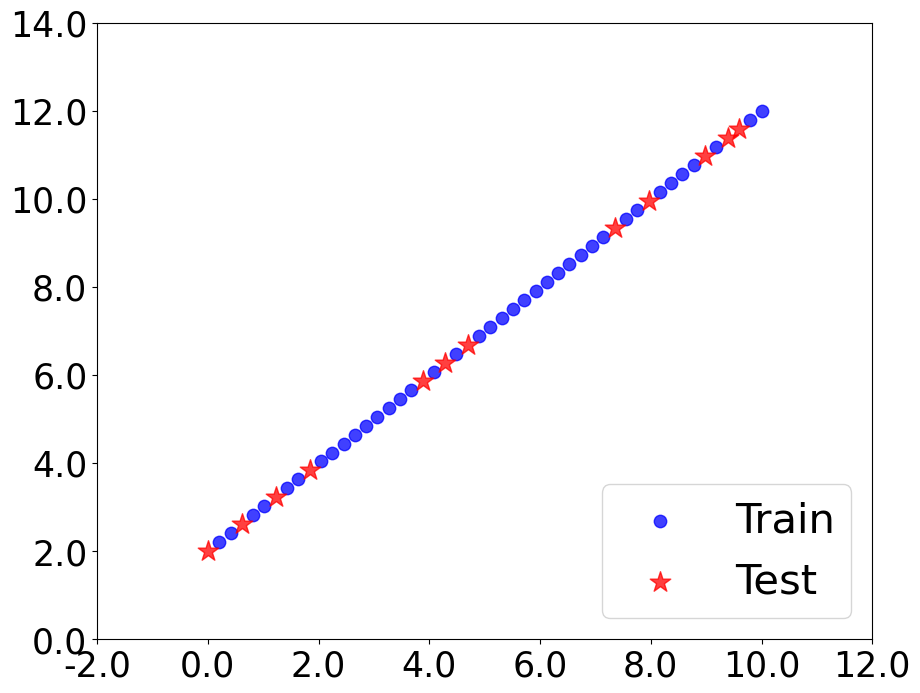

In [357]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
ax.scatter(Xtr, Ytr, s=80, color='blue', alpha=0.75, label='Train')
ax.scatter(Xte, Yte, s=240, marker='*', color='red', alpha=0.75, label='Test')

ax.set_xlim(-0.2, 10.2)
ax.set_ylim(1.8, 12.2)

ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks(), fontsize=25)
ax.set_yticklabels(ax.get_yticks(), fontsize=25)   

# Controlling the size of the legend and the location.
ax.legend(fontsize=30, loc=4)

plt.show()    

Now let's see how we can call the linear regression.

In [358]:
lr = ml.linear.linearRegress(Xtr, Ytr)

Boom, that's it. But you should go into the code and make sure you understand how it works. 

### Plotting the regression line

In [359]:
# We start with creating a set of xs on the space we want to predict for.
xs = np.linspace(0, 10, 200)
print(xs.shape)

# Converting to the rate shape
xs = np.atleast_2d(xs).T
print(xs.shape)

# And now the prediction
ys = lr.predict(xs)
print(ys.shape)

(200,)
(200, 1)
(200, 1)


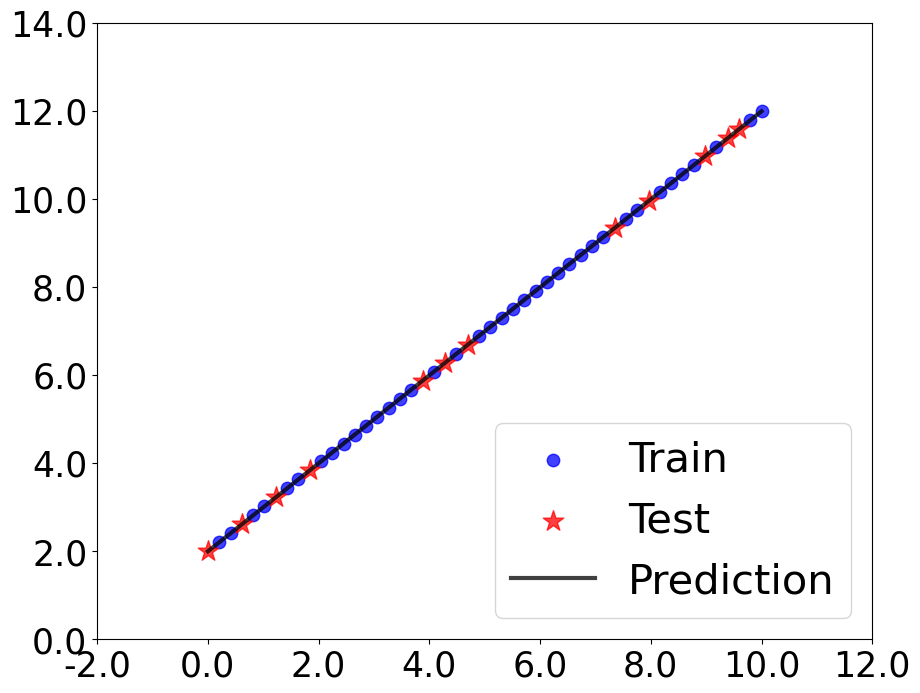

In [360]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
ax.scatter(Xtr, Ytr, s=80, color='blue', alpha=0.75, label='Train')
ax.scatter(Xte, Yte, s=240, marker='*', color='red', alpha=0.75, label='Test')

# Also plotting the regression line
ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')

ax.set_xlim(-0.2, 10.2)
ax.set_ylim(1.8, 12.2)

ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks(), fontsize=25)
ax.set_yticklabels(ax.get_yticks(), fontsize=25)   

# Controlling the size of the legend and the location.
ax.legend(fontsize=30, loc=4)

plt.show()    

We can also print the learned regression object. This will show us the coefficients for each feature. Notice that the regression model added a constant for us.

In [361]:
print(lr)

linearRegress model, 1 features
[[2. 1.]]


The print above means that the linear regression learned the function Y = 2 + 1 * X.

## Real Data

That was a toy example, let's look at how this is done on real data. 

In [362]:
path_to_file = 'data/poly_data.txt' 
data = np.genfromtxt(path_to_file, delimiter='\t') # Read data from file 

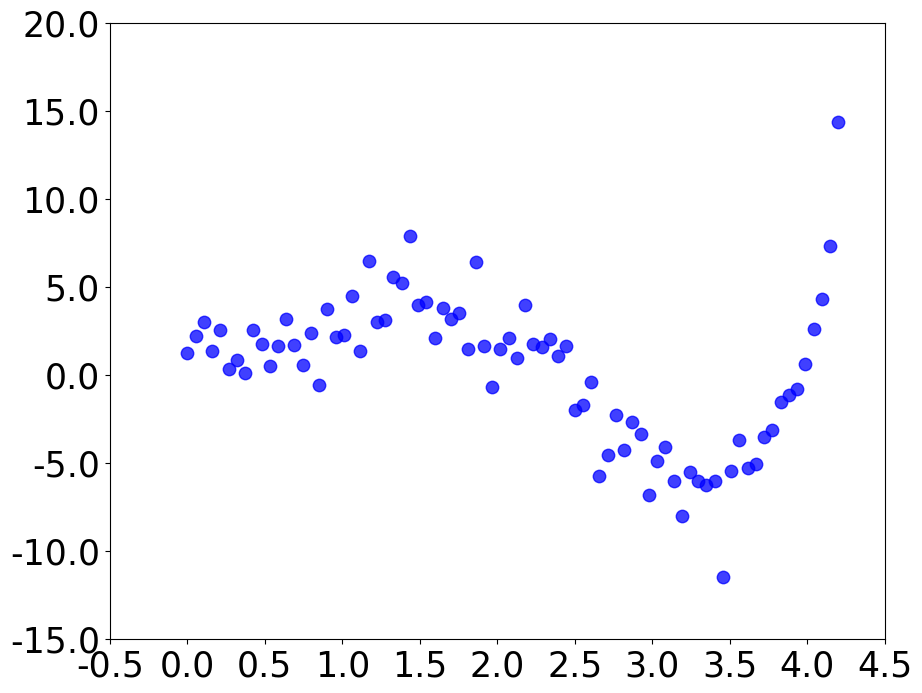

In [363]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
ax.scatter(data[:, 0], data[:, 1], s=80, color='blue', alpha=0.75)

ax.set_xlim(-0.2, 4.3)
ax.set_ylim(-13, 18)

ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks(), fontsize=25)
ax.set_yticklabels(ax.get_yticks(), fontsize=25)   

plt.show()    

Now let's repeate everything on the real data.

In [364]:
X, Y = np.atleast_2d(data[:, 0]).T, data[:, 1]
print(X.shape, Y.shape)
X, Y = ml.shuffleData(X, Y)
Xtr, Xte, Ytr, Yte = ml.splitData(X, Y, 0.75)
print(Xtr.shape, Xte.shape, Ytr.shape, Yte.shape)

lr = ml.linear.linearRegress(Xtr, Ytr)

print(lr)

(80, 1) (80,)
(60, 1) (20, 1) (60,) (20,)
linearRegress model, 1 features
[[ 3.7169281  -1.67949631]]


In [365]:
# Make sure you use the currect space.
xs = np.linspace(0, 4.2, 200)
print(xs.shape)

xs = np.atleast_2d(xs).T

ys = lr.predict(xs)

(200,)


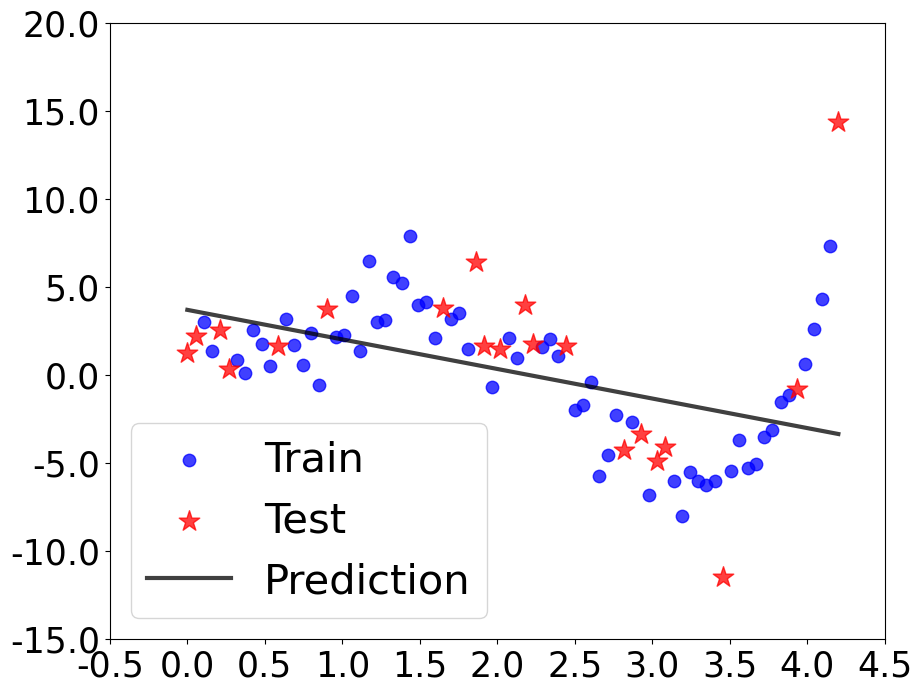

In [366]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
ax.scatter(Xtr, Ytr, s=80, color='blue', alpha=0.75, label='Train')
ax.scatter(Xte, Yte, s=240, marker='*', color='red', alpha=0.75, label='Test')

# Also plotting the regression line
ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')

ax.set_xlim(-0.2, 4.3)
ax.set_ylim(-13, 18)

ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks(), fontsize=25)
ax.set_yticklabels(ax.get_yticks(), fontsize=25)   

# Controlling the size of the legend and the location.
ax.legend(fontsize=30, loc=0)

plt.show()    

Meh, the predicions don't look that great. Why is that?

(Because we're fitting Y=X+c line where it's clear that this data comes from a more complex model.)

So let's fit a more complex model. For that we can use the ml.transform.fpoly method that will convert the features for us.

In [367]:
degree = 12
XtrP = ml.transforms.fpoly(Xtr, degree, False)

lr = ml.linear.linearRegress(XtrP, Ytr)

print(lr)


linearRegress model, 1 features
[[ 2.60478859e+01 -3.78964627e+02  2.10585834e+03 -5.91957095e+03
   9.67994371e+03 -9.93589643e+03  6.70005626e+03 -3.04022135e+03
   9.33115021e+02 -1.90779978e+02  2.48505190e+01 -1.86229175e+00
   6.09790567e-02]]


In [368]:
# Make sure you use the currect space.
xs = np.linspace(0, 4.2, 200)
xs = np.atleast_2d(xs).T

# Notice that we have to transform the predicting xs too.
xsP = ml.transforms.fpoly(xs, degree, False)
ys = lr.predict(xsP)

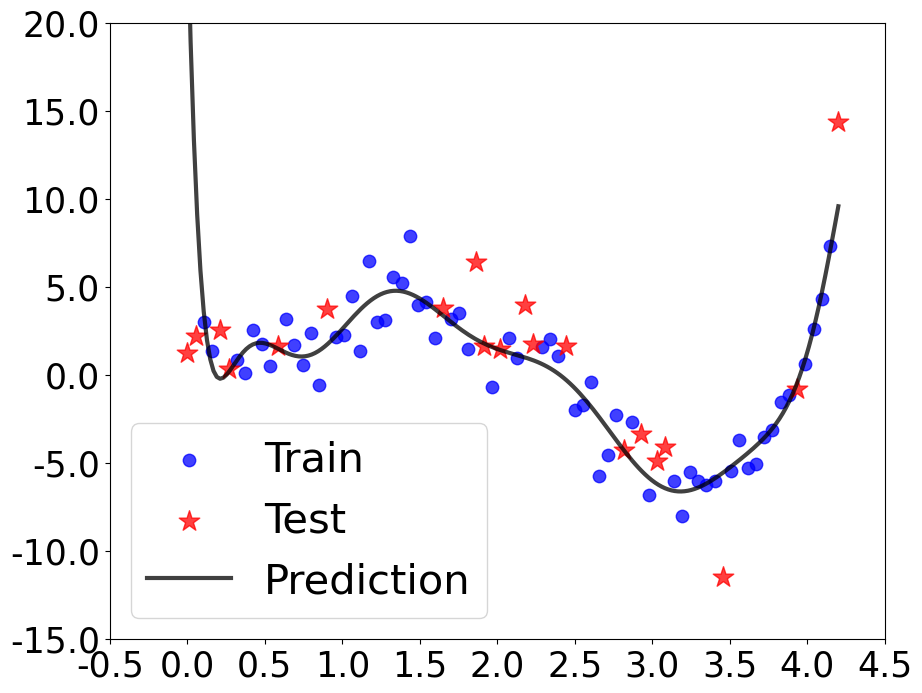

In [369]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
ax.scatter(Xtr, Ytr, s=80, color='blue', alpha=0.75, label='Train')
ax.scatter(Xte, Yte, s=240, marker='*', color='red', alpha=0.75, label='Test')

# Also plotting the regression line. in the plotting we plot the xs and not the xsP
ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')

ax.set_xlim(-0.2, 4.3)
ax.set_ylim(-13, 18)

ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks(), fontsize=25)
ax.set_yticklabels(ax.get_yticks(), fontsize=25)   

# Controlling the size of the legend and the location.
ax.legend(fontsize=30, loc=0)

plt.show()    

Feel free to play around with different degrees and see the differences.

## Measuring Prediction Accuracy

Now you are required to measure the prediction error using MSE and plot it for different degrees.

In [370]:
def MSE(y_true, y_hat):
    """Mock MSE method.
    
    You'll have to fill it in yourself with the true way of computing the MSE.
    """
    y_true = np.squeeze(y_true)
    y_hat = np.squeeze(y_hat)
    return np.mean((y_true - y_hat)**2)

In [371]:
# Predicting on the test data - DO NOT FORGET TO TRANSFORM Xte TOO!!!
XteP = ml.transforms.fpoly(Xte, degree, False)
YteHat = lr.predict(XteP)

Adding the predicted Yhat to the plot. Notice that it sits on the regression line (as expected).

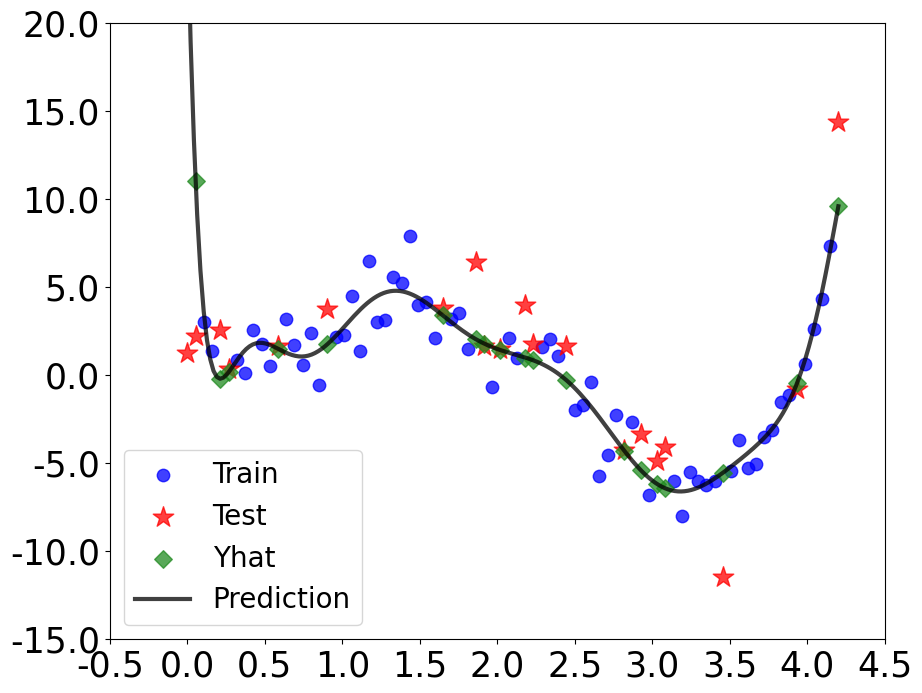

In [372]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
ax.scatter(Xtr, Ytr, s=80, color='blue', alpha=0.75, label='Train')
ax.scatter(Xte, Yte, s=240, marker='*', color='red', alpha=0.75, label='Test')
ax.scatter(Xte, YteHat, s=80, marker='D', color='forestgreen', alpha=0.75, label='Yhat')

# Also plotting the regression line. in the plotting we plot the xs and not the xsP
ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')

ax.set_xlim(-0.2, 4.3)
ax.set_ylim(-13, 18)

ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks(), fontsize=25)
ax.set_yticklabels(ax.get_yticks(), fontsize=25)   

# Controlling the size of the legend and the location.
ax.legend(fontsize=20, loc=0)

plt.show()    

Computing the MSE for the different degrees.

In [373]:
degrees = np.array([2, 4, 6, 8, 10, 20])
mse_error = np.zeros(degrees.shape[0])

for i, degree in enumerate(degrees):
    XtrP = ml.transforms.fpoly(Xtr, degree, False)

    lr = ml.linear.linearRegress(XtrP, Ytr)
    XteP = ml.transforms.fpoly(Xte, degree, False)
    YteHat = lr.predict(XteP)

    mse_error[i] = MSE(Yte, YteHat)

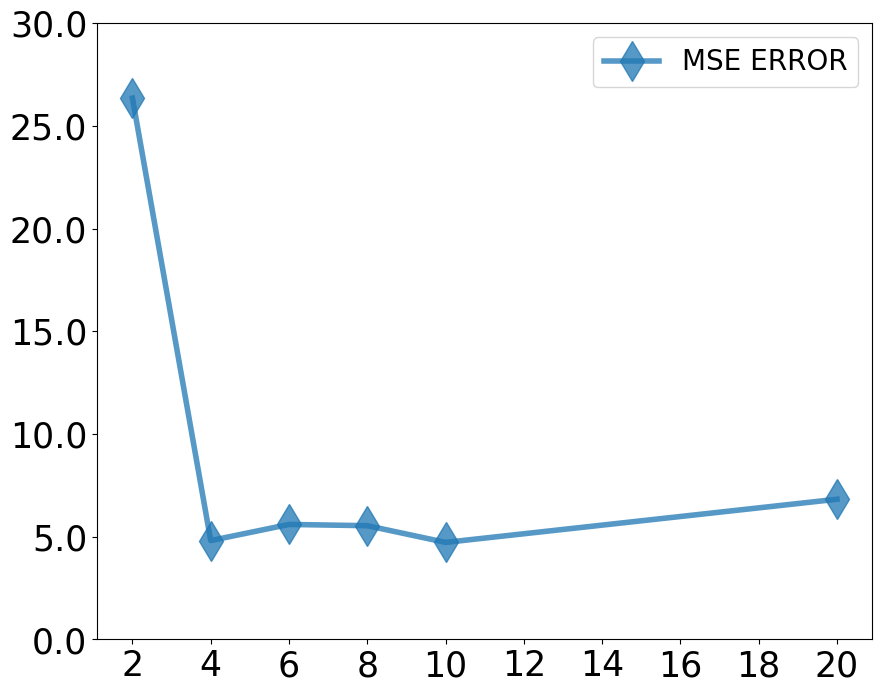

In [374]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plotting a line with markers where there's an actual x value.
# ax.semilogy(degrees, mse_error, lw=4, marker='d', markersize=20, alpha=0.75, label='MSE ERROR')

ax.plot(degrees, mse_error, lw=4, marker='d', markersize=20, alpha=0.75, label='MSE ERROR')


# Setting the X-ticks manually.
ax.set_xticks(np.arange(2, 21, 2))
ax.set_yticks(ax.get_yticks())

ax.set_xticklabels(ax.get_xticks(), fontsize=25)
ax.set_yticklabels(ax.get_yticks(), fontsize=25)   

ax.legend(fontsize=20, loc=0)

plt.show()

## Cross Validation

Cross-validation works by creating many training/validation splits, called folds, and using all of these splits to assess the “out-of-sample” (validation) performance by averaging them. 

We provide the function $\bf{ml.crossValidate(Xtr, Ytr, nFolds, iFold)}$ to generate multiple training/validation splits.

In [375]:
nFolds = 4 

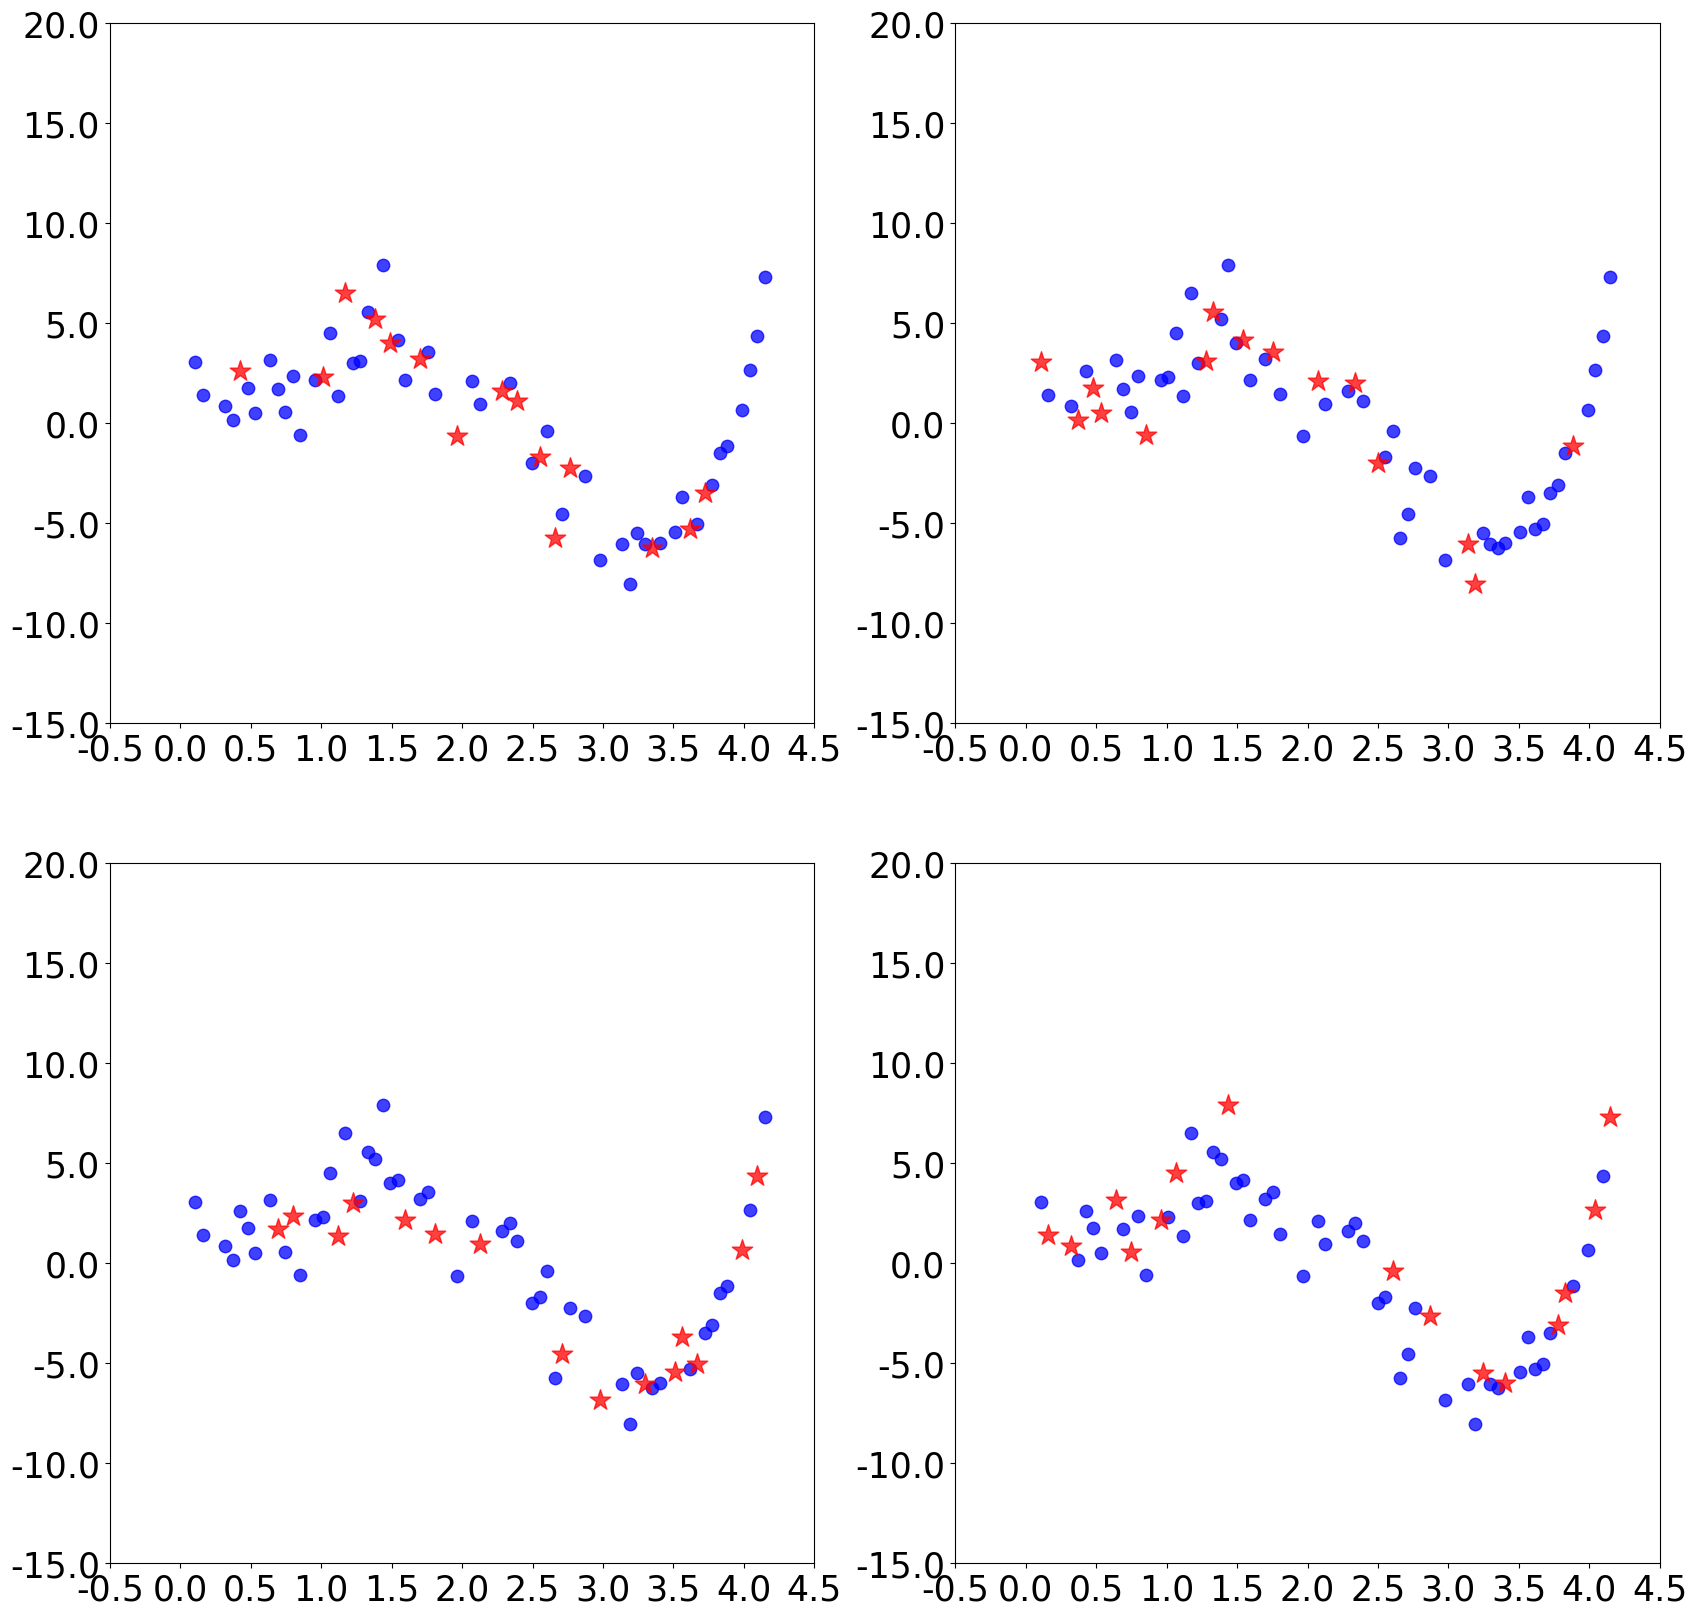

In [376]:
f, ax = plt.subplots(2, 2, figsize=(20, 20))
ax = ax.flatten()
for iFold in range(nFolds):
    Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr, Ytr, nFolds, iFold)
    ax[iFold].scatter(Xti, Yti, s=80, color='blue', alpha=0.75, label='Train')
    ax[iFold].scatter(Xvi, Yvi, s=240, marker='*', color='red', alpha=0.75, label='Test')

    ax[iFold].set_xlim(-0.2, 4.3)
    ax[iFold].set_ylim(-13, 18)
    
    ax[iFold].set_xticks(ax[iFold].get_xticks())
    ax[iFold].set_yticks(ax[iFold].get_yticks())
    ax[iFold].set_xticklabels(ax[iFold].get_xticks(), fontsize=25)
    ax[iFold].set_yticklabels(ax[iFold].get_yticks(), fontsize=25)   
    
plt.show()